# Review of data ingested from TAPoR (draft)

This is document cheks the TAPoR dataset using the python library Pandas.

Reference to ticket: https://gitlab.gwdg.de/sshoc/data-ingestion/-/issues/7

Main results: https://docs.google.com/spreadsheets/d/1vPMjlT0ZsOTCASR4CPMxlGs9XHxhp6NkMEWabzGHueY/edit#gid=0


# Preamble

In [331]:
import ast
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bokeh.io import output_notebook, show
from bokeh.plotting import figure

# for db
import sqlalchemy as db
from sqlalchemy import *

In [332]:
engine = create_engine(
      "connectionstring")
connection = engine.connect()
metadata = db.MetaData()

# Import data

## Query the DB to get TAPoR data

The TAPoR dataset used in this document is the sql dump published by Education and Research Archive (ERA) University of Alberta: 

https://era.library.ualberta.ca/items/f2da0666-f523-44d4-a83c-fa06351a1e94 

(creation date: 2020-01-01).
The table *tool* contains 1504 records, each one describing a tool. 
Records have been filtered according the value of the field *tool.is_approved*, there are 1363 *approved* records.
In this document this dataset will be called the **TAPoR dataset**.

*Note that the TAPoR dataset reviewed here is not the same that has been used for the MP ingestion, this document will be update when we'll have it*


In [299]:
df_db_tools=pd.read_sql_query('SELECT * FROM TaPOR.tools where is_approved=1 order by last_updated', connection)
df_db_tools.index

RangeIndex(start=0, stop=1363, step=1)

### An example of TAPoR item
Let's take a look at a random TAPoR dataset entry.
(The database schema of the TAPoR dataset is described here: https://era.library.ualberta.ca/items/f2da0666-f523-44d4-a83c-fa06351a1e94/download/8057eae2-3fae-4afa-bc8e-6dcc2a257b6f.)

In [300]:
#df_db_tools.dtypes
df_db_tools.iloc[500]

id                                                                 254
user_id                                                            NaN
name                                                         TextQuest
detail               <p>TextQuest is a text analysis program availa...
url                  http://www.textquest.de/pages/en/general-infor...
is_approved                                                          1
creators_name                                Social Science Consulting
creators_email                                       info@textquest.de
creators_url                                  http://www.textquest.de/
image_url                                       images/tools/0/254.png
star_average                                                         0
is_hidden                                                            0
last_updated                                                2013-05-13
documentation_url    http://www.textquest.de/pages/en/analysis-of-t...
code  

The following table shows 5 records of the TAPoR dataset.

In [301]:
df_db_tools.sort_values('name').head(5)

id  user_id             name  \
906    937      1.0           140kit   
334   1229      1.0   3DVIA Virtools   
688    783      1.0    4th Dimension   
1156   648    937.0           80legs   
770   1454      1.0  960 Grid System   

                                                 detail  \
906   <p>140kit provides a management layer for twee...   
334   <p>A software tool for the creation of 3D inte...   
688   4th Dimension is a graphic environment for dev...   
1156  80legs is a web crawling service. You need to ...   
770   <p>960 Grid System is a CSS template that come...   

                                                    url  is_approved  \
906         https://github.com/WebEcologyProject/140kit            1   
334                                                None            1   
688   http://www.4d.com/products/4d2004/4dstandarded...            1   
1156                                 http://80legs.com/            1   
770                                     https://960.gs/            1   

                  creators_name creators_email           creators_url  \
906   Ian Pearce, Devin Gaffney           None                   None   
334           Dassault Systemes           None                   None   
688                          4D           None     http://www.4d.com/   
1156                     80legs                                         
770                Nathan Smith           None  http://sonspring.com/   

                    image_url  ...  is_hidden  last_updated documentation_url  \
906    images/tools/1/937.png  ...          0    2018-10-05              None   
334                      None  ...          0          None              None   
688    images/tools/1/783.png  ...          0    2018-09-18              None   
1156   images/tools/1/648.png  ...          0    2018-10-30              None   
770   images/tools/2/1454.png  ...          0    2018-09-27              None   

      code                                      repository language  nature  \
906   None                                            None      NaN       0   
334   None                                            None      NaN       0   
688   None                                            None      NaN       0   
1156  None                                                      NaN       0   
770   None  https://github.com/nathansmith/960-Grid-System      NaN       0   

              created_at          updated_at recipes  
906  2015-05-24 00:00:00 2018-10-05 04:43:34          
334  2014-12-29 00:00:00 2014-12-29 00:00:00          
688  2015-05-24 00:00:00 2018-09-18 20:39:31          
1156 2017-10-15 23:04:46 2018-10-30 16:03:45          
770  2014-12-29 00:00:00 2018-09-27 22:29:43          

[5 rows x 21 columns]

### Check for duplicates in TAPoR dataset
Considering the values for 'name' and 'url', it appears that in the TAPoR dataset there are 4 duplicated descriptions

In [302]:
duplicateRowsDF0 = df_db_tools[df_db_tools.duplicated(['name', 'url'])].sort_values('name')
#print("The (possibly) duplicated items in TAPoR dataset:")
duplicateRowsDF0.head(15)

id  user_id               name  \
1358   148      NaN            AntConc   
1362  1565   1201.0      SentiStrength   
652    580    937.0  Voyant 2.0: Knots   
653    581    937.0  Voyant 2.0: Knots   

                                                 detail  \
1358  AntConc is free concordance software. It is mu...   
1362  SentiStrength is a sentiment analysis (opinion...   
652   Voyant Knots is a visualization where a line i...   
653   Voyant Knots is a visualization where a line i...   

                                                   url  is_approved  \
1358  http://www.laurenceanthony.net/software/antconc/            1   
1362                   http://sentistrength.wlv.ac.uk/            1   
652                http://voyant-tools.org/?view=knots            1   
653                http://voyant-tools.org/?view=knots            1   

                              creators_name             creators_email  \
1358                       Laurence Anthony          anthony@waseda.jp   
1362                          Mike Thelwall       m.thelwall@wlv.ac.uk   
652   Stéfan Sinclair and Geoffrey Rockwell  stefan.sinclair@mcgill.ca   
653   Stéfan Sinclair and Geoffrey Rockwell  stefan.sinclair@mcgill.ca   

                                       creators_url                image_url  \
1358  http://www.antlab.sci.waseda.ac.jp/index.html   images/tools/0/148.png   
1362                 http://sentistrength.wlv.ac.uk  images/tools/3/1565.png   
652                     http://stefansinclair.name/   images/tools/1/580.png   
653                     http://stefansinclair.name/   images/tools/1/581.png   

      ...  is_hidden  last_updated  \
1358  ...          0    2019-08-19   
1362  ...          0    2019-09-27   
652   ...          1    2016-04-29   
653   ...          0    2016-04-29   

                                      documentation_url  code repository  \
1358  http://www.laurenceanthony.net/software/antcon...  None              
1362                                               None  None              
652                                                None  None              
653                                                None  None              

     language  nature          created_at          updated_at recipes  
1358      NaN       0 2012-07-30 18:25:44 2019-08-19 00:37:45          
1362      NaN       0 2019-09-20 05:03:47 2019-09-27 10:03:35          
652       NaN       0 2016-04-29 16:08:28 2017-10-31 14:26:36          
653       NaN       0 2016-04-29 16:11:55 2017-10-31 14:26:36          

[4 rows x 21 columns]

## Get the ingested  TAPoR data in the Market Place (using the API)

The SSHOC Market Place API entry: 

 https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/tools

has been used to extract the TAPoR descriptions imported in the SSHOC Market Place. In the rest of the document this dataset will be called: **MP dataset**

In [303]:
#x = ('2','3','4','5')
x = pd.Series(range(2,69))
url = 'https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/tools?page=1&perpage=20'
df_tool_all = pd.read_json(url, orient='columns')
for var in x:
    url = "https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/tools?page="+str(var)+"&perpage=20"
    df_tool_par=pd.read_json(url, orient='columns')
    df_tool_all=df_tool_all.append(df_tool_par, ignore_index=True)
   # print("url: "+ url + ":",var)
df_tool_all.index

RangeIndex(start=0, stop=1354, step=1)

There are 1353 tool descriptions in MP dataset. The following table shows 10 records of the MP dataset.

Let's take a look at row 500 of the MP dataset

In [304]:
#descriptions are in JSON,  create a dataframe
pd.reset_option('max_colwidth')
df_tool_flat = pd.json_normalize(df_tool_all['tools'])
df_tool_flat.iloc[500]
#df_tool_flat.sort_values('label').head(10)

id                                                                      1283
category                                                                tool
label                                                                  INTEX
version                                                                 None
description                INTEX is a linguistic development environment ...
licenses                                                                  []
contributors               [{'actor': {'id': 888, 'name': 'Max Silberztei...
properties                 [{'id': 23391, 'type': {'code': 'keyword', 'la...
accessibleAt                     http://www.nyu.edu/pages/linguistics/intex/
sourceItemId                                                             205
relatedItems                                                              []
informationContributors    [{'id': 4, 'username': 'System importer', 'dis...
lastInfoUpdate                                      2020-08-06T10:50:42+0000

In the MP dataset there are 1353 tool descriptions.

In [305]:
df_tool_flat.index

RangeIndex(start=0, stop=1354, step=1)

#### Considering the values for 'label' and 'accessibleAT', it appears that in the MP dataset there are a number of duplicated descriptions

List fo duplicates: https://docs.google.com/spreadsheets/d/1vPMjlT0ZsOTCASR4CPMxlGs9XHxhp6NkMEWabzGHueY/edit#gid=0

In [306]:
test_p_d=df_tool_flat[df_tool_flat.duplicated(['label', 'accessibleAt'], keep=False)].sort_values('label')
test_p_d

id category                           label version  \
326    335     tool                       EVI-LINHD    None   
327   1311     tool                       EVI-LINHD    None   
532    776     tool                            JSAN    None   
533   1319     tool                            JSAN    None   
534    451     tool                            JSAN    None   
697   1186     tool                          NodeXL    None   
698    995     tool                          NodeXL    None   
854    872     tool  Python Tools for Text-Analysis    None   
855    560     tool  Python Tools for Text-Analysis    None   
947   1136     tool                   SentiStrength    None   
948    378     tool                   SentiStrength    None   
949    640     tool                   SentiStrength    None   
1187   607     tool                          UCINET    None   
1188   238     tool                          UCINET    None   
475    165     tool                          igraph    None   
476    506     tool                          igraph    None   

                                            description licenses  \
326   EVI-LINHD is a free and open-source cloud plat...       []   
327   EVI-LINHD is a free and open-source cloud plat...       []   
532   The Integrated JStylo and Anonymouth Package. ...       []   
533   The Integrated JStylo and Anonymouth Package. ...       []   
534   The Integrated JStylo and Anonymouth Package. ...       []   
697   NodeXL is a free, open source tool for generat...       []   
698   NodeXL is a template for Microsoft XL that gre...       []   
854   This is a set of simple, free tools for analyz...       []   
855   This is a set of simple, free tools for analyz...       []   
947   SentiStrength is a tool for sentiment analysis...       []   
948   It is a sentiment analysis program. Automatic ...       []   
949   SentiStrength is a sentiment analysis (opinion...       []   
1187  UCINET is a social media analysis set for soft...       []   
1188  UCINET is a software package for analyzing net...       []   
475   igraph is an open source collection of network...       []   
476   Igraph is a series of network analysis functio...       []   

                                           contributors  \
326   [{'actor': {'id': 275, 'name': 'Elena González...   
327   [{'actor': {'id': 275, 'name': 'Elena González...   
532   [{'actor': {'id': 493, 'name': '18th Connect',...   
533   [{'actor': {'id': 493, 'name': '18th Connect',...   
534   [{'actor': {'id': 493, 'name': '18th Connect',...   
697   [{'actor': {'id': 832, 'name': 'M. Smith, N. M...   
698   [{'actor': {'id': 493, 'name': '18th Connect',...   
854   [{'actor': {'id': 424, 'name': 'David L. Hoove...   
855   [{'actor': {'id': 424, 'name': 'David L. Hoove...   
947   [{'actor': {'id': 799, 'name': 'Thelwall, M., ...   
948   [{'actor': {'id': 493, 'name': '18th Connect',...   
949   [{'actor': {'id': 482, 'name': 'Mike Thelwall'...   
1187  [{'actor': {'id': 459, 'name': 'Borgatti, S.P....   
1188                                                 []   
475   [{'actor': {'id': 147, 'name': 'Gábor Csárdi, ...   
476   [{'actor': {'id': 493, 'name': '18th Connect',...   

                                             properties  \
326   [{'id': 27996, 'type': {'code': 'media', 'labe...   
327   [{'id': 28009, 'type': {'code': 'keyword', 'la...   
532   [{'id': 22459, 'type': {'code': 'keyword', 'la...   
533   [{'id': 22456, 'type': {'code': 'media', 'labe...   
534   [{'id': 22453, 'type': {'code': 'media', 'labe...   
697   [{'id': 26713, 'type': {'code': 'keyword', 'la...   
698   [{'id': 27731, 'type': {'code': 'license-type'...   
854   [{'id': 21832, 'type': {'code': 'media', 'labe...   
855   [{'id': 21829, 'type': {'code': 'repository-ur...   
947   [{'id': 26279, 'type': {'code': 'license-type'...   
948   [{'id': 22479, 'type': {'code': 'media', 'labe...   
949   [{'id': 22484, 'type': {'code': 'keyword', 'la...   
1187  [{

In [307]:
#test_p_d.sort_values('id').to_csv(path_or_buf='/Users/cesare/Documents/sshoc/wp7/duplicatedtaporitems.csv')

In [308]:
df_tool_flat['accessibleAt'].replace(np.nan, "", inplace=True)
df_tool_flat['accessibleAt'].replace(r'^\s*$', "", regex=True)
#df_tool_flat['accessibleAt'].isnull()

0             https://github.com/WebEcologyProject/140kit
1                                                        
2       http://www.4d.com/products/4d2004/4dstandarded...
3                                      http://80legs.com/
4                                         https://960.gs/
                              ...                        
1349                                                     
1350                              https://www.zotero.org/
1351                                  http://zotfile.com/
1352              https://wordpress.org/plugins/zotpress/
1353    http://www.zubrag.com/tools/html-tags-stripper...
Name: accessibleAt, Length: 1354, dtype: object

In [309]:
#dataframe for MP properties
df_prop_data = pd.json_normalize(data=df_tool_all['tools'], record_path='properties', meta=['label'])
df_prop_data.head(10)

id           value        type.code       type.label type.type  \
0  31281            None         activity         Activity   concept   
1  31282       Gathering          keyword          Keyword    string   
2  31283  Run in Browser       web-usable       Web Usable    string   
3  31284         Capture          keyword          Keyword    string   
4  31285        Analysis    tadirah-goals    Tadirah Goals    string   
5  31286            None         activity         Activity   concept   
6  31287       Gathering  tadirah-methods  Tadirah Methods    string   
7  31288   Visualization  tadirah-methods  Tadirah Methods    string   
8  31289            None         activity         Activity   concept   
9  31290   Visualization          keyword          Keyword    string   

                            type.allowedVocabularies concept.code  \
0  [{'code': 'nemo-activity-type', 'label': 'NeMO...           11   
1                                                 []          NaN   
2                                                 []          NaN   
3                                                 []          NaN   
4                                                 []          NaN   
5  [{'code': 'nemo-activity-type', 'label': 'NeMO...            7   
6                                                 []          NaN   
7                                                 []          NaN   
8  [{'code': 'nemo-activity-type', 'label': 'NeMO...           25   
9                                                 []          NaN   

  concept.vocabulary.code                           concept.vocabulary.label  \
0        tadirah-activity  TaDiRAH - Taxonomy of Digital Research Activit...   
1                     NaN                                                NaN   
2                     NaN                                                NaN   
3                     NaN                                                NaN   
4                     NaN                                                NaN   
5        tadirah-activity  TaDiRAH - Taxonomy of Digital Research Activit...   
6                     NaN                                                NaN   
7                     NaN                                                NaN   
8        tadirah-activity  TaDiRAH - Taxonomy of Digital Research Activit...   
9                     NaN                                                NaN   

   concept.vocabulary.accessibleAt concept.label concept.notation  \
0                              NaN     Gathering                    
1                              NaN           NaN              NaN   
2                              NaN           NaN              NaN   
3                              NaN           NaN              NaN   
4                              NaN           NaN              NaN   
5                              NaN       Capture                    
6                              NaN           NaN              NaN   
7                              NaN           NaN              NaN   
8                              NaN      Analysis                    
9                              NaN           NaN              NaN   

  concept.definition                                        concept.uri  \
0                     https://sshoc.poolparty.biz/Vocabularies/tadir...   
1                NaN                                                NaN   
2                NaN                                                NaN   
3                NaN                                                NaN   
4                NaN                                                NaN   
5                     https://sshoc.poolparty.biz/Vocabularies/tadir...   
6                NaN                                                NaN   
7                NaN                                                NaN   
8                     https://sshoc.poolparty.biz/Vocabularies/tadir...   
9                NaN                                          

In [310]:
#dataframe for MP contributors
df_contr_data = pd.json_normalize(data=df_tool_all['tools'], record_path='contributors', meta=['label'])
#df_contr_data.head(10)

In [311]:
df_mpdatasets=df_tool_flat.join(df_contr_data.set_index('label'), on='label')
#df_mpdatasets.head()

### Comparing TAPoR dataset and MP datasets to find import issues

In [312]:
#create a dataframe with a subset of columns for the TAPoR dataset
df_tapor_worksub=df_db_tools.sort_values('name')[['name', 'url']].drop_duplicates()
df_tapor_worksub['url'].replace(np.nan, "", inplace=True)
df_tapor_worksub['url'].replace(r"\s+", np.nan, regex=True)
#df_tapor_worksub['url'].isnull()
#df_tapor_worksub.tail(30)

906           https://github.com/WebEcologyProject/140kit
334                                                      
688     http://www.4d.com/products/4d2004/4dstandarded...
1156                                   http://80legs.com/
770                                       https://960.gs/
                              ...                        
816                  http://www.jasondavies.com/wordtree/
520                    http://code.google.com/p/word2vec/
815             https://code.google.com/p/wordsimilarity/
702     http://www.tei-c.org/Vault/MembersMeetings/200...
45                                                       
Name: url, Length: 1359, dtype: object

In [313]:
#create a dataframe with a subset of columns for the MP dataset and change column names to have homogenous formats
df_mp_taporsub= df_tool_flat[df_tool_flat['source.label'] == 'TAPoR']
df_mp_worksub=df_mp_taporsub.sort_values('label')[['label','accessibleAt']].drop_duplicates()
df_mp_worksub=df_mp_worksub.rename(columns={"label": "name", 'accessibleAt':'url'})
#df_mp_worksub['url'].isnull()

In [314]:
# define a function that compares dataframes
def dataframe_difference(df1, df2, which):
    """Find rows which are different between two DataFrames."""
    comparison_df = df1.merge(df2,
                              indicator=True,
                              how='outer')
    if which is None:
        diff_df = comparison_df[comparison_df['_merge'] != 'both']
    else:
        diff_df = comparison_df[comparison_df['_merge'] == which]
    diff_df.to_csv('data/diff.csv')
    return diff_df

#### Considering  values for 'name' and 'url', there are 1260 tool descriptions in MP dataset that are identical to descriptions in TAPoR dataset

In [315]:
df_both=dataframe_difference(df_mp_worksub, df_tapor_worksub, 'both')
df_both.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343],
           dtype='int64', length=1260)

In [316]:
df_both.head()

name                                                url _merge
0           140kit        https://github.com/WebEcologyProject/140kit   both
1   3DVIA Virtools                                                      both
2    4th Dimension  http://www.4d.com/products/4d2004/4dstandarded...   both
3           80legs                                 http://80legs.com/   both
4  960 Grid System                                    https://960.gs/   both

#### Considering values for 'name' and 'url',  there are 83 tool descriptions in  MP dataset but not in TAPoR dataset

In [317]:
df_lo=dataframe_difference(df_mp_worksub.sort_values('name'), df_tapor_worksub.sort_values('name'), 'left_only')
# see 20 records in MP dataset but not in TAPoR
df_lo.head(20)

name                                                url  \
124              CATMA 6.0                                   https://catma.de   
143                 CONDOR                  http://www.ickn.org/ckntools.html   
145                 CQPweb                        https://cqpweb.lancs.ac.uk/   
147               CSV Sort        https://bitbucket.org/richardpenman/csvsort   
157             CasualConc          https://sites.google.com/site/casualconc/   
162                Chartle                                                      
164                 Chorus                      http://chorusanalytics.co.uk/   
166       Chronos Timeline  http://hyperstudio.mit.edu/software/chronos-ti...   
181           Code Bubbles              http://cs.brown.edu/~spr/codebubbles/   
185           Colaboratory  https://colab.research.google.com/notebooks/we...   
215             ContaWords                    http://contawords.iula.upf.edu/   
216            Contropedia                            http://contropedia.net/   
221                   Cowo  https://github.com/seinecle/Cowo/blob/master/R...   
224          Critic Markup                           http://criticmarkup.com/   
229              Cytoscape                          http://www.cytoscape.org/   
255  Density Design - Knot        http://www.densitydesign.org/research/knot/   
257            DfR Browser             https://agoldst.github.io/dfr-browser/   
301              EVI-LINHD                           http://www.evilinhd.com/   
308             EgoWeb 2.0            http://www.rand.org/methods/egoweb.html   
333              Facepager               https://github.com/strohne/Facepager   

        _merge  
124  left_only  
143  left_only  
145  left_only  
147  left_only  
157  left_only  
162  left_only  
164  left_only  
166  left_only  
181  left_only  
185  left_only  
215  left_only  
216  left_only  
221  left_only  
224  left_only  
229  left_only  
255  left_only  
257  left_only  
301  left_only  
308  left_only  
333  left_only

#### Comparing values for 'name' and 'url', there are 99 tool descriptions in  TAPoR dataset but not in MP dataset

In [318]:
df_ro=dataframe_difference(df_mp_worksub.sort_values('name'), df_tapor_worksub.sort_values('name'), 'right_only')
df_ro.head(20)

name                   url  \
1344                                              ANNIS                         
1345                                        Adobe Flash                         
1346                                            Ainm.ie                         
1347                                           Alpheios                         
1348                                          Anastasia                         
1349                                        ArcExplorer                         
1350                            AroniSmartIntelligence™                         
1351                                            Aruspix                         
1352                                               BASE                         
1353      Basement Waterproofing: Tips and Instructions                         
1354                                    Berkeley Parser                         
1355  CATMA (Computer Aided Textual Markup and Analy...  http://www.catma.de/   
1356  Canva "The Amazingly Simple Graphic Design Sof...                         
1357                                            Chicken                         
1358                                       CloudConvert                         
1359                                          Collocate               http://   
1360                                       Commentpress                         
1361                                  CoolTool NeuroLab                         
1362                                          Datapress                         
1363                                          Delicious                         

          _merge  
1344  right_only  
1345  right_only  
1346  right_only  
1347  right_only  
1348  right_only  
1349  right_only  
1350  right_only  
1351  right_only  
1352  right_only  
1353  right_only  
1354  right_only  
1355  right_only  
1356  right_only  
1357  right_only  
1358  right_only  
1359  right_only  
1360  right_only  
1361  right_only  
1362  right_only  
1363  right_only

## Distribution of updates of items in TAPoR dataset considering 'updated_at' value

Check the content of the field 'updated_at' for TAPoR dataset descriptions. This value *seems* the date when a description of a tool has been  updated the last time.


In [319]:
df_db_tools['correctdata']=pd.to_datetime(df_db_tools['updated_at'])
df_db_tools['justdata'] = df_db_tools['correctdata'].dt.year
df_reg_tm_sorted=df_db_tools.sort_values('updated_at')
df_reg_tools_sub=df_reg_tm_sorted[['name', 'url', 'updated_at']]
df_reg_tools_sub.head()

name   url updated_at
334              3DVIA Virtools  None 2014-12-29
136                      Exceed  None 2014-12-29
290                     Pattern  None 2014-12-29
286  HathiTrust Digital Library  None 2014-12-29
142                      Lextek  None 2014-12-29

Text(0.5, 1.0, 'Number of tools by year their description has been updated')

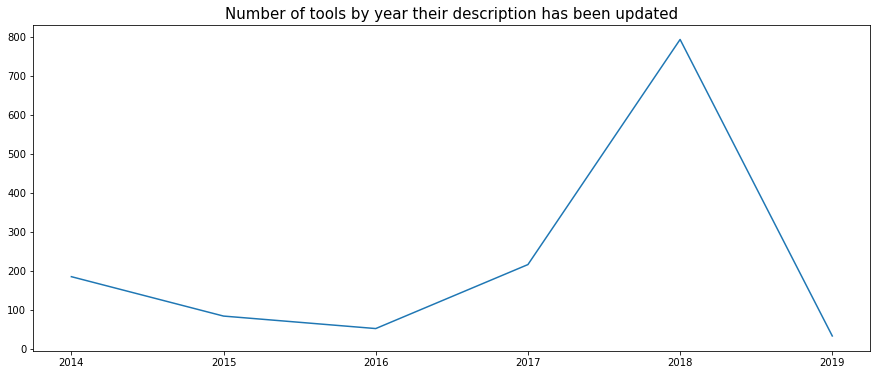

In [320]:
f, ax1 = plt.subplots(nrows=1, figsize=(15,6))
df_reg_tm_sorted.justdata.value_counts().reindex(sorted(df_reg_tm_sorted.justdata.value_counts().index)).plot(ax=ax1)
ax1.set_title('Number of tools by year their description has been updated', fontsize=15)

##### The list of items updated before 1/1/2016
https://docs.google.com/spreadsheets/d/1vPMjlT0ZsOTCASR4CPMxlGs9XHxhp6NkMEWabzGHueY/edit#gid=0

In [321]:
df_reg_tools_sub_old=df_reg_tools_sub[df_reg_tools_sub['updated_at'] < '2016-1-1']
df_reg_tools_sub_old_rename=df_reg_tools_sub_old.rename(columns={'name':'label'})
df_db_mp_tools_old_ = pd.merge(df_tool_flat, df_reg_tools_sub_old_rename, on='label')
df_db_mp_tools_old_[['id', 'label', 'accessibleAt', 'updated_at']].sort_values('id').tail()

id             label accessibleAt updated_at
145  1439         Pear Note              2014-12-29
223  1445       WikiMindMap              2014-12-29
80   1454  iBreadCrumbs.com              2014-12-29
190  1461      Survey Daddy              2014-12-29
198  1463   The Observer XT              2014-12-29

In [322]:
df_db_mp_tools_old_[['id', 'label', 'accessibleAt', 'updated_at']].sort_values('id').to_csv(path_or_buf='/Users/cesare/Documents/sshoc/wp7/oldtaporitems.csv')

## Check URL in TAPoR dataset
In TAPoR dataset there are descriptions where the URL of a Tool is not provided

In [323]:
df_reg_tools_sub['url'].replace(np.nan, "", inplace=True)

/Users/cesare/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [324]:
df_reg_tools_sub_emurl=df_reg_tools_sub[df_reg_tools_sub['url'] == '']
#print("number of record with missed URL in TAPoR dataset:")
df_reg_tools_sub_emurl.count()

name          576
url           576
updated_at    576
dtype: int64

In [325]:
df_reg_tools_sub_whurl=df_reg_tools_sub[df_reg_tools_sub['url'] != '']
df_reg_tools_sub_whurl.index

Int64Index([ 656,  665,  666,  669,  423,  522,  523,  525,  526,  527,
            ...
             767, 1358,  799, 1247, 1245, 1361, 1223, 1360, 1359, 1362],
           dtype='int64', length=787)

In [326]:
#df_reg_tools_sub.head()
#for column in df_reg_tools_sub[['name', 'url']]:
#   # Select column contents by column name using [] operator
#   columnSeriesObj = df_reg_tools_sub[column]
#   print('Colunm Name : ', column)
#   print('Column Contents : ', columnSeriesObj.values)
df_urls=df_reg_tools_sub_whurl.url.values
#df_urls

In [327]:
data = {'url':  ['test'],'status': [1]}
df_http_status = pd.DataFrame (data, columns = ['url','status'])
import requests
import re
regex = re.compile(
        r'^(?:http|ftp)s?://' # http:// or https://
        r'(?:(?:[A-Z0-9](?:[A-Z0-9-]{0,61}[A-Z0-9])?\.)+(?:[A-Z]{2,6}\.?|[A-Z0-9-]{2,}\.?)|' #domain...
        r'localhost|' #localhost...
        r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})' # ...or ip
        r'(?::\d+)?' # optional port
        r'(?:/?|[/?]\S+)$', re.IGNORECASE)


for var in df_urls:
   # print(var)
    if ( var != "" and var!=None and re.match(regex, var)):
        try:
            r =requests.get(var,timeout=8)
            #print("result: "+var+ " ",r.status_code)
            df_http_status = df_http_status.append({'url': var, 'status': int(r.status_code)}, ignore_index=True)
        except requests.exceptions.ConnectionError:
          #  print(var)
            df_http_status = df_http_status.append({'url': var, 'status': int(503)}, ignore_index=True)
        except requests.exceptions.ConnectTimeout:
          #  print(var)
            df_http_status = df_http_status.append({'url': var, 'status': int(408)}, ignore_index=True)
        except requests.exceptions.ReadTimeout:
         #   print(var)
            df_http_status = df_http_status.append({'url': var, 'status': int(408)}, ignore_index=True)
        except requests.exceptions.RequestException:
         #   print(var)
            df_http_status = df_http_status.append({'url': var, 'status': int(500)}, ignore_index=True)
        except TypeError:
        #    print(var)
            df_http_status = df_http_status.append({'url': var, 'status': int(400)}, ignore_index=True)
    else:
       # print(var ,0)
        df_http_status = df_http_status.append({'url': var, 'status': int(400)}, ignore_index=True)
df_http_status.head()

url  status
0                                               test       1
1  https://github.com/recrm/ArchiveTools/blob/mas...     200
2                                        testtool.ca     400
3                           https://www.mozenda.com/     403
4         http://www.enchantedlearning.com/wordlist/     200

### The HTTP result status values for URL in TAPoR dataset descriptions

The table below shows the HTTP Status code (https://en.wikipedia.org/wiki/List_of_HTTP_status_codes) obtained when 'clicking' on URL of tool descriptions of TAPoR dataset.

There is a significant number of URLs that seems not correct (status 404, 503, 500, 508....), notice that while 404 means that the link is not valid, other status codes may indicate temporary problems.

In [328]:
df_http_status_sub=df_http_status[df_http_status['status'] != 1]
df_db_st = df_http_status_sub['status'].value_counts()
df_db_st.head(10)

200    656
404     84
503     20
403     12
406      7
500      3
408      2
400      2
420      1
Name: status, dtype: int64

In [329]:
df_http_status_err=df_http_status_sub[df_http_status['status'] != 200]
#df_http_status_err.tail()
#df_db_tools_url_err=df_db_tools.join(df_http_status_err.set_index('url'), on='url')
df_db_tools_url_err = pd.merge(df_db_tools, df_http_status_err, on='url')
#print (df)
pd.reset_option('max_columns')
pd.set_option('max_colwidth', None)
df_db_tools_url_err[['id', 'name', 'url', 'status']].tail(10)

/Users/cesare/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


id                                                name  \
123   205                                               INTEX   
124    44                             Tokenize - HTML (TAPoR)   
125   106           Stanford NLP Group: Part-of-Speech Tagger   
126  1138                     Social Science Research Network   
127   922                                          Participad   
128   231                                         TACTweb 1.0   
129  1122                            Event Structure Analysis   
130   149                   Laurence Anthony: AntWordProfiler   
131   217  DV-COLL (Donne Variorum Textual Collation Program)   
132  1534                                            Prospect   

                                                                  url  status  
123                       http://www.nyu.edu/pages/linguistics/intex/     404  
124  http://taporware.ualberta.ca/~taporware/htmlTools/tokenize.shtml     404  
125                     http://nlp.stanford.edu/software/tagger.shtml     408  
126                                          https://www.ssrn.com/en/     403  
127                                            http://participad.org/     503  
128                                      http://tactweb.cch.kcl.ac.uk     503  
129                               http://www.indiana.edu/~socpsy/ESA/     404  
130         http://www.laurenceanthony.net/antwordprofiler_index.html     406  
131           http://donnevariorum.tamu.edu/resources/down/index.html     404  
132                                         https://prospect.unc.edu/     503

In [330]:
df_mp_all_worksub=df_tool_flat.rename(columns={'accessibleAt':'url'})
df_db_mp_tools_url_err = pd.merge(df_mp_all_worksub, df_http_status_err, on='url')
pd.set_option('max_colwidth', None)

df_db_mp_tools_url_err[['id', 'label', 'url', 'status_y']].tail(10)


id                                            label  \
119   879  Using Regular Expressions to Clean Up Web Pages   
120  1164                           UVic Image Markup Tool   
121   357                  Version Variation Visualization   
122   352           Visual Understanding Environment (VUE)   
123   456              Web Page Cleaner - Beta (TAPoRware)   
124   605            Weighted Centroid - Other (TAPoRware)   
125   761                                           Wiggio   
126   740                                         WinBrill   
127  1345                    Word Brush - Beta (TAPoRware)   
128   376                    Word Cloud - Beta (TAPoRware)   

                                                                                                                                                                  url  \
119  https://github.com/TAPoR-3-Tools/Tapor-Coding-Tools/tree/master/tapor_coding_tools/text%20cleaning/Using%20Regular%20Expressions%20to%20Clean%20Up%20Web%20Pages   
120                                                                                                              http://tapor.uvic.ca/~mholmes/image_markup/index.php   
121                                                                                                                               http://www.delightedbeauty.org/vvv/   
122                                                                                                                                    http://vue.tufts.edu/index.cfm   
123                                                                                                http://taporware.ualberta.ca/~taporware/betaTools/webcleaner.shtml   
124                                                                                                http://taporware.ualberta.ca/~taporware/otherTools/wcentroid.shtml   
125                                                                                                                                               https://wiggio.com/   
126                                                                                                                           http://www.atilf.fr/spip.php?article899   
127                                                                                                 http://taporware.ualberta.ca/~taporware/betaTools/wordbrush.shtml   
128                                                                                                 http://taporware.ualberta.ca/~taporware/betaTools/wordcloud.shtml   

     status_y  
119       404  
120       503  
121       403  
122       404  
123       404  
124       404  
125       503  
126       404  
127       404  
128       404

### Save the list of wrong URLs in csv

Uncomment the command in the following cell and set up your path to export the list of wrong URL in MP dataset as csv file. The list of possibly wrong URL is here: https://docs.google.com/spreadsheets/d/1vPMjlT0ZsOTCASR4CPMxlGs9XHxhp6NkMEWabzGHueY/edit#gid=0

In [3]:
#df_db_mp_tools_url_err[['id', 'label', 'url', 'status_y']].sort_values('id').to_csv(path_or_buf='/pathsshoc/wp7/taporurlstatus.csv')

## TAPoR dataset 'creators' 
There are 164 descriptions in TAPoR dataset that don't have values in *creators_name* field, and there are 924 different creators. 


In [178]:
pd.reset_option('max_colwidth')
df_db_tools_na=df_db_tools[df_db_tools['creators_name'] == ''].sort_values('last_updated')
df_db_tools_na.index

Int64Index([649, 686, 697, 701, 706, 719, 733, 736, 746, 765,
            ...
            405, 407, 408, 410, 412, 414, 416, 417, 420, 422],
           dtype='int64', length=164)

In [333]:
#the number of creators
len(df_db_tools['creators_name'].unique())-1

924

In [334]:
df_db_tools.loc[df_db_tools['creators_name']=='','creators_name']='n/a'
df_db_tech_NoCoT = df_db_tools['creators_name'].value_counts()

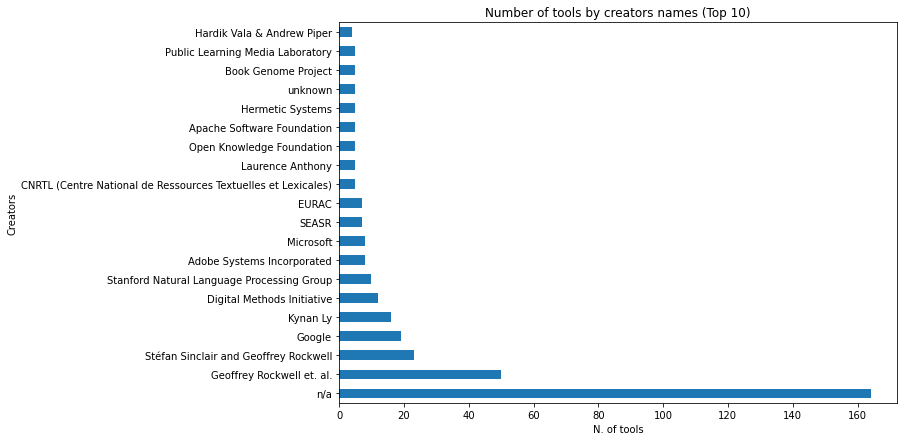

In [335]:
fig, ax = plt.subplots()
df_db_tech_NoCoT.head(20).plot.barh(figsize=(10,7), ax=ax)
ax.set_title('Number of tools by creators names (Top 10)')
ax.set_xlabel('N. of tools')
ax.set_ylabel('Creators');

Number of tool descriptions in TAPoR dataset that don't have the related creator email

In [336]:
df_db_tools_naem=df_db_tools[df_db_tools['creators_email'] == ''].sort_values('last_updated')
#df_db_tools_naem.index
len(df_db_tools_naem)

382

Number of tool description in TAPoR dataset that don't have the related creator URL

In [337]:
df_db_tools_nau=df_db_tools[df_db_tools['creators_url'] == ''].sort_values('last_updated')
len(df_db_tools_nau)

171

# ------ 

In [338]:
df_db_tech=pd.read_sql_query('select t.id, t.name, t.detail, t.creators_name, t.last_updated, at.name as "attributetype", av.name as"attribute", tags.text as "tag" from TaPOR.tools as t, TaPOR.attribute_values as av, TaPOR.tool_attributes as ta, TaPOR.attribute_types as at, TaPOR.tags as tags, TaPOR.tool_tags as tota where t.is_approved=1 and t.id=ta.tool_id and t.id=tota.tool_id and tags.id=tota.tag_id and ta.attribute_value_id=av.id and ta.attribute_type_id=at.id', connection)
#df_db_tech=pd.read_sql_table('tools', connection)

In [36]:
#df_db_tech.head(10)

In [37]:
df_db_tech.index

RangeIndex(start=0, stop=43845, step=1)

In [38]:
df_db_tech.columns

Index(['id', 'name', 'detail', 'creators_name', 'last_updated',
       'attributetype', 'attribute', 'tag'],
      dtype='object')

In [39]:
df_items=df_db_tech[['id', 'name', 'detail', 'creators_name', 'last_updated']].drop_duplicates()
#df_items.head(10)

## Attributes in TAPoR dataset items

The following dataframe shows the list of attribute types defined in TaPOR dataset to charachterize tools

In [103]:
df_db_tools_toa=pd.read_sql_query('SELECT distinct name FROM TaPOR.attribute_types', connection)
df_db_tools_toa.head(20)

name
0                        Type of analysis
1                         Type of license
2                   Background Processing
3                              Web Usable
4                             Ease of Use
5                                 Warning
6                                   Usage
7                             Tool Family
8   Historic Tool (developed before 2005)
9                          Compute Canada
10                         Link to Recipe
11                          TaDiRAH Goals
12                        TaDiRAH Methods

### Tools with no attribute in TAPoR dataset

The following dataframe shows the main fields of tool descriptions in TAPoR dataset that do not have attribute values

In [104]:
df_db_tools_noatt=pd.read_sql_query('select distinct tools.id, tools.name, tools.creators_name, tools.url from TaPOR.tools where tools.is_approved=1 and tools.id not in (select distinct TaPOR.tool_attributes.tool_id from TaPOR.tool_attributes)', connection)
df_db_tools_noatt.head(19)

id                                               name  \
0    579                                  Voyant 2.0: Knots   
1    591                                     Warc Extractor   
2    754                       TAGS https://t.co/T007ezdZoA   
3    755  Multiple enhancements to DiRT Directory (tools...   
4    758  RT : Today's "dirt": DiRT now uses TaDiRAH ter...   
5    823      Basement Waterproofing: Tips and Instructions   
6   1017                                          Datapress   
7   1063                                        WordVenture   
8   1174                                        VoiceThread   
9   1183                                         Purdue OWL   
10  1352                                            Aruspix   
11  1369                                              MMax2   
12  1377                                             Lextek   

                                        creators_name  \
0               Stéfan Sinclair and Geoffrey Rockwell   
1                    Ryan Chartier & Internet Archive   
2                                                       
3                                                       
4                                                       
5                                                       
6                                           MIT CSAIL   
7                                             WordNet   
8                                     VoiceThread LLC   
9   Purdue University Writing Lab, Purdue Universi...   
10                                                      
11                                                      
12                                                      

                                                  url  
0                 http://voyant-tools.org/?view=knots  
1   https://github.com/recrm/ArchiveTools/blob/mas...  
2                                                None  
3                                                None  
4                                                None  
5                                                None  
6                                                None  
7                                                None  
8                                                None  
9                                                None  
10                                               None  
11                                               None  
12                                               None

## Type of Licenses in TAPoR dataset items

In [42]:
df_db_sub=df_db_tech[['id', 'name', 'detail', 'creators_name', 'last_updated', 'attributetype', 'attribute']]
df_to=df_db_sub[df_db_sub['attributetype'] == 'Type of license'].drop_duplicates()
df_to.index

Int64Index([    8,    40,    44,   108,   170,   306,   330,   344,   362,
              380,
            ...
            43679, 43728, 43730, 43751, 43762, 43779, 43814, 43816, 43821,
            43824],
           dtype='int64', length=1024)

In [43]:
df_db_lic = df_to['attribute'].value_counts()
df_db_lic.head(10)

Free                470
Open Source         256
Closed Source       195
Commercial           79
Creative Commons     22
Shareware             2
Name: attribute, dtype: int64

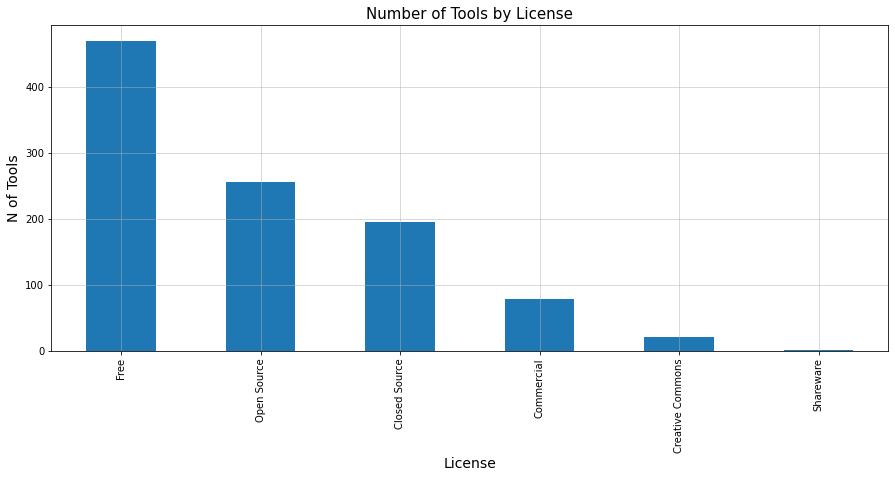

In [44]:
fig, ax = plt.subplots()
df_db_lic.plot(kind='bar', figsize=(15,6), x='licences', y='tools',)
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number of Tools by License", fontsize=15)
ax.set_xlabel('License', fontsize=14)
ax.set_ylabel('N of Tools', fontsize=14);
plt.show()

In [45]:
#df_db_tech.loc[df_db_tech['country']=='', 'country']='N/A'

## *Type of analysis*  in TAPoR dataset items

A tool description can have more than one value for *Type of analysis* (i.e. a tool can perform one or more type of analysis)

In [156]:
df_to_ta=df_db_sub[df_db_sub['attributetype'] == 'Type of analysis'].drop_duplicates()
df_to_ta.tail(10)

id                                   name  \
43724  1499                                 iPhoto   
43726  1499                                 iPhoto   
43748  1500                    Google 3D Warehouse   
43749  1500                    Google 3D Warehouse   
43750  1500                    Google 3D Warehouse   
43759  1501    SketchUp (Formerly Google SketchUp)   
43760  1501    SketchUp (Formerly Google SketchUp)   
43761  1501    SketchUp (Formerly Google SketchUp)   
43790  1502  GIMP (GNU Image Manipulation Program)   
43818  1556                                 Reaper   

                                                  detail creators_name  \
43724  <p>iPhoto is a digital photograph manipulation...         Apple   
43726  <p>iPhoto is a digital photograph manipulation...         Apple   
43748  <p>A collection of free-to-download 3D models ...        Google   
43749  <p>A collection of free-to-download 3D models ...        Google   
43750  <p>A collection of free-to-download 3D models ...        Google   
43759  <p>Google SketchUp is easy-to-use free 3D mode...        Google   
43760  <p>Google SketchUp is easy-to-use free 3D mode...        Google   
43761  <p>Google SketchUp is easy-to-use free 3D mode...        Google   
43790  <p>GIMP is image editing software, much like P...     GIMP Team   
43818  REAPER is a complete digital audio production ...        Cockos   

      last_updated     attributetype       attribute  
43724   2018-10-12  Type of analysis      Organizing  
43726   2018-10-12  Type of analysis         Storage  
43748   2018-11-06  Type of analysis   Collaboration  
43749   2018-11-06  Type of analysis   Dissemination  
43750   2018-11-06  Type of analysis        Modeling  
43759   2018-10-26  Type of analysis        Creation  
43760   2018-10-26  Type of analysis  Interpretation  
43761   2018-10-26  Type of analysis        Modeling  
43790         None  Type of analysis        Creation  
43818   2019-03-24  Type of analysis        Creation

In [47]:
df_db_a = df_to_ta['attribute'].value_counts()
df_db_a.head(25)

Analysis                       434
Visualization                  236
Content Analysis               185
Search                         139
Natural Language Processing    125
Discovering                    124
Capture                        113
Gathering                       97
Publishing                      92
Dissemination                   91
Enrichment                      90
Annotating                      83
Collaboration                   80
Organizing                      71
Creation                        52
Uncategorized                   49
Storage                         40
Web development                 39
Modeling                        25
Programming                     22
Interpretation                  18
RDF                             12
Name: attribute, dtype: int64

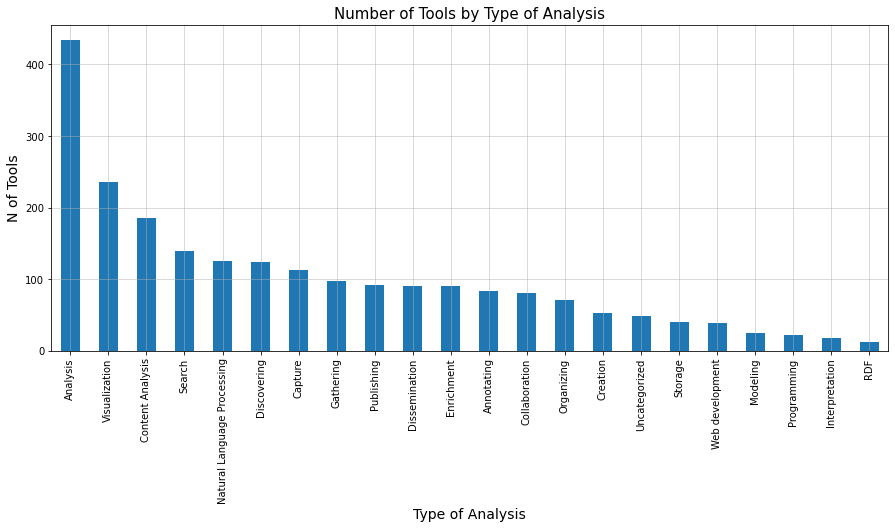

In [48]:
fig, ax = plt.subplots()
df_db_a.plot(kind='bar', figsize=(15,6), x='analysys', y='tools',)
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number of Tools by Type of Analysis", fontsize=15)
ax.set_xlabel('Type of Analysis', fontsize=14)
ax.set_ylabel('N of Tools', fontsize=14);
plt.show()

## *Tool families* in TAPoR dataset items

In [49]:
df_to_tf=df_db_sub[df_db_sub['attributetype'] == 'Tool Family'].drop_duplicates()
df_to_tf = df_to_tf['attribute'].value_counts()
df_to_tf.head(20)

TAPoRware                     55
Voyant                        18
Digital Methods Initiative    12
Stanford NLP                  11
SEASR                          8
SIMILE Widgets                 6
EURAC                          5
CNRTL                          5
Visualizing Literature         5
Book Genome Project            5
CHNM                           4
Orlando                        3
Laurence Anthony               3
Stanford HCI Group             2
Stanford Vis Group             2
Scholars' Lab                  2
Name: attribute, dtype: int64

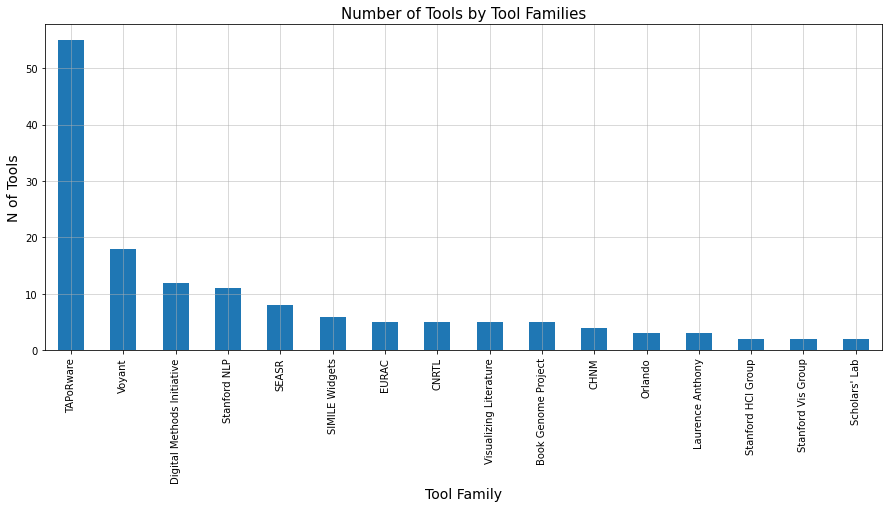

In [50]:
fig, ax = plt.subplots()
df_to_tf.plot(kind='bar', figsize=(15,6), x='analysys', y='tools',)
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number of Tools by Tool Families", fontsize=15)
ax.set_xlabel('Tool Family', fontsize=14)
ax.set_ylabel('N of Tools', fontsize=14);
plt.show()

## *Web Usable*  in TAPoR items

In [51]:
df_to_bp=df_db_sub[df_db_sub['attributetype'] == 'Web Usable'].drop_duplicates()
df_to_bp.head()

id                           name  \
16    1  List Words - HTML (TAPoRware)   
52    4                         Wordle   
82    5           OrlandoVision (OVis)   
118   8                  Voyant Cirrus   
192   9                   Voyant Links   

                                                detail  \
16   <p>This tool lists words in an HTML document, ...   
52   <p>Wordle is an online toy for generating <a h...   
82   <p>An application for visualizing a specific c...   
118  <p>Cirrus is a visualization tool that display...   
192  <p>Links finds collocates for words and displa...   

                             creators_name last_updated attributetype  \
16               Geoffrey Rockwell et. al.   2011-11-27    Web Usable   
52                       Jonathan Feinberg   2018-10-17    Web Usable   
82                     The Orlando Project   2018-11-01    Web Usable   
118  Stéfan Sinclair and Geoffrey Rockwell   2018-10-05    Web Usable   
192  Stéfan Sinclair and Geoffrey Rockwell   2018-09-18    Web Usable   

                             attribute  
16                      Run in Browser  
52                      Run in Browser  
82   Software you Download and Install  
118                     Run in Browser  
192                     Run in Browser

In [52]:
df_to_bp = df_to_bp['attribute'].value_counts()
df_to_bp.head(10)

Run in Browser                       503
Other                                400
Software you Download and Install    187
Web Application you Launch             8
Name: attribute, dtype: int64

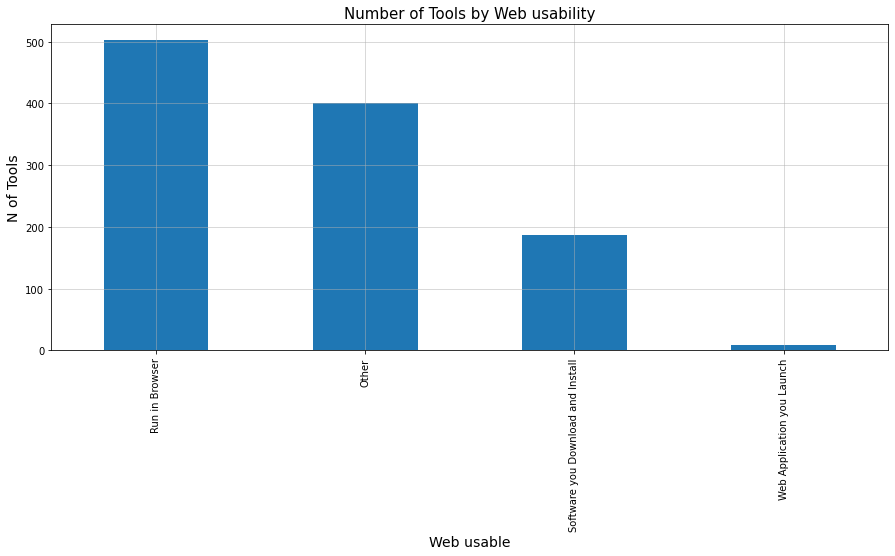

In [53]:
fig, ax = plt.subplots()
df_to_bp.plot(kind='bar', figsize=(15,6), x='webusable', y='tools',)
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number of Tools by Web usability", fontsize=15)
ax.set_xlabel('Web usable', fontsize=14)
ax.set_ylabel('N of Tools', fontsize=14);
plt.show()

## *TaDiRAH Goals*  in TAPoR items|

In [228]:
df_to_tg=df_db_sub[df_db_sub['attributetype'] == 'TaDiRAH Goals'].drop_duplicates()
df_to_tm_vc = df_to_tg['attribute'].value_counts()
df_to_tm_vc.head(10)

Analysis          407
Capture           118
Dissemination      91
Enrichment         90
Creation           72
Storage            40
Interpretation     18
Name: attribute, dtype: int64

## *TaDiRAH Goals*  in Market Place items
To be completed...

In [267]:
#df_prop_data.applymap(lambda x: isinstance(x, dict) or isinstance(x, list)).all()
df_temp_prop_data=df_prop_data[['value','type.code','type.label','label']]
df_mp_ds_tg=df_tool_flat.join(df_temp_prop_data.set_index('label'), on='label')
df_mo_tg=df_mp_ds_tg[df_mp_ds_tg['type.code'] == 'tadirah-goals'].astype('str').drop_duplicates()
df_mo_tg_vc=df_mo_tg['value'].value_counts()
df_mo_tg_vc.head(10)

Analysis          527
Capture           151
Enrichment        116
Dissemination     107
Creation           83
Storage            45
Interpretation     25
Name: value, dtype: int64

In [289]:
df_mo_tg_print=df_mo_tg[df_mo_tg['value'] == 'Interpretation'].sort_values('label')

In [290]:
#df_mo_tg_print[['id', 'label', 'sourceItemId', 'accessibleAt', 'value', 'type.label' ]].sort_values('id').to_csv(path_or_buf='/Users/cesare/Documents/sshoc/wp7/df_mo_tg.csv')

In [291]:
df_to_tg_print=df_to_tg[df_to_tg['attribute'] == 'Interpretation'].sort_values('name')
#df_to_tg_print[['id', 'name', 'attributetype', 'attribute']].sort_values('id').to_csv(path_or_buf='/Users/cesare/Documents/sshoc/wp7/dftotg.csv')

## TaDiRAH Methods in TAPoR items

In [154]:
df_to_tm=df_db_sub[df_db_sub['attributetype'] == 'TaDiRAH Methods'].drop_duplicates()
df_to_tm_vc = df_to_tm['attribute'].value_counts()
df_to_tm_vc.head(10)

Visualization           226
Other (analysis)        213
Content Analysis        185
Statistical Analysis    156
Discovering             154
Annotating               97
Gathering                97
Publishing               80
Sharing                  80
Collaboration            74
Name: attribute, dtype: int64

## ------